<a href="https://colab.research.google.com/github/Eng-Emmy/CNN-SINIFLANDIRMA-MODEL2-3/blob/main/Model2CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KENDİ GÖRÜNTÜ VERİ SETİNİZLE CNN SINIFLANDIRMA MODELİ GELİŞTİRİN**

* Adınız: **Emmanuel**
* Soyadınız: **HAKIRUWIZERA**
* Okul Numaranız: **2440631002**
* GitHub Repo Bağlantısı:

# **Proje Açıklaması**

Bu proje, iPhone kamerasıyla çekilmiş 400 görüntüden oluşan özel bir veri kümesi kullanarak görüntü sınıflandırması için Evrişimli Sinir Ağı (CNN) modelleri geliştirmeye ve iyileştirmeye odaklanmaktadır. Veri kümesi, bilgisayarla görme görevleri için düzenlenmiş ve eğitim, doğrulama ve test setlerine ayrılmıştır.

Veri Kümesi
Toplam görüntü sayısı: 400
Dağılım:

Eğitim: 320 görüntü
Doğrulama: 40 görüntü
Test: 40 görüntü

Bu projede elma, portakal, domates ve patlıcan sınıfları kullanılmıştır.
Görüntüler, CNN tabanlı sınıflandırma için ön işleme tabi tutulmuş ve uygun şekilde yapılandırılmıştır.

Model 2: Temel CNN

Basit bir CNN mimarisi uygulandı.
Eğitim süreci:

Hazırlanan veri kümesi üzerinde model eğitildi.
Eğitim doğruluğu ve kayıp grafikleri çizildi.
Performans değerlendirmesi için test seti doğruluğu kaydedildi.




Model 3: Geliştirilmiş CNN

Model 2 aşağıdaki iyileştirmelerle geliştirildi:

Hiperparametre ayarlamaları (en az üç parametre):

Filtre sayısı (ör. 32 → 64 → 128)
Batch boyutu (ör. 32 → 64 veya 128)
Öğrenme oranı (ör. 0.001 → 0.0005)
Dropout oranı (ör. 0.2 → 0.4)
Ek konvolüsyon katmanları eklendi


ImageDataGenerator ile veri artırma:

rotation_range = 15
width_shift_range = 0.1
horizontal_flip = True


Eğitim sonrası analiz:

Eğitim ve doğrulama doğruluk/kayıp grafikleri çizildi.
Test seti doğruluğu raporlandı.
Hangi değişikliklerin sonucu iyileştirdiği analiz edildi.

Performans Değerlendirmesi

Model 3, Model 2 ile karşılaştırılarak iyileştirmeler değerlendirildi.
Hiperparametre ayarlamaları ve veri artırmanın doğruluk ve genelleme üzerindeki etkisi tartışıldı.
Performans farklarının nedenleri veya sınırlamalar vurgulandı.

# SET OF LIBRARY

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
from pathlib import Path


drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Colab_Notebooks2/Project/crops/train'
val_path = '/content/drive/MyDrive/Colab_Notebooks2/Project/crops/valid'
test_path = '/content/drive/MyDrive/Colab_Notebooks2/Project/crops/test'
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
img_width = 128
img_height = 128

A list comprehension is used to iterate through all image paths in train_data, applying the preprocess_image function to each path. This approach efficiently processes every image in the dataset, transforming them into a standardized format. The result of the comprehension is a list containing preprocessed image arrays, which can then be utilized for tasks such as model training or validation.

# Eğitim, doğrulama ve test verisini ayır
* Accoeding to dataset collection images, the split has 80% of traing, 10% for validation and 10% of test.
* Train data =320 images , validation data =40 images and test data=40 images

In [ ]:
x_train = tf.keras.utils.image_dataset_from_directory(
        train_path,
        image_size=(img_width, img_height)
    )

class_names = x_train.class_names

Found 320 files belonging to 4 classes.


In [ ]:
x_val = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=(img_width, img_height))

Found 40 files belonging to 4 classes.


In [ ]:
x_test = tf.keras.utils.image_dataset_from_directory(
    test_path, image_size=(img_width, img_height))

Found 40 files belonging to 4 classes.


* In this step, the pixel values of the images in the database are normalized to a range between 0 and 1.
* The images are stored in RGB format, where each pixel value originally ranges from 0 to 255.
* Deep learning models typically exhibit improved efficiency and stability when operating on smaller numerical values.
* Therefore, each pixel value is divided by 255 to transform it into a normalized value within the interval [0, 1].

In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Piksel değerlerini 0-1 arasına ölçekle
x_train = x_train.map(normalize_img)
x_val = x_val.map(normalize_img)
x_test = x_test.map(normalize_img)

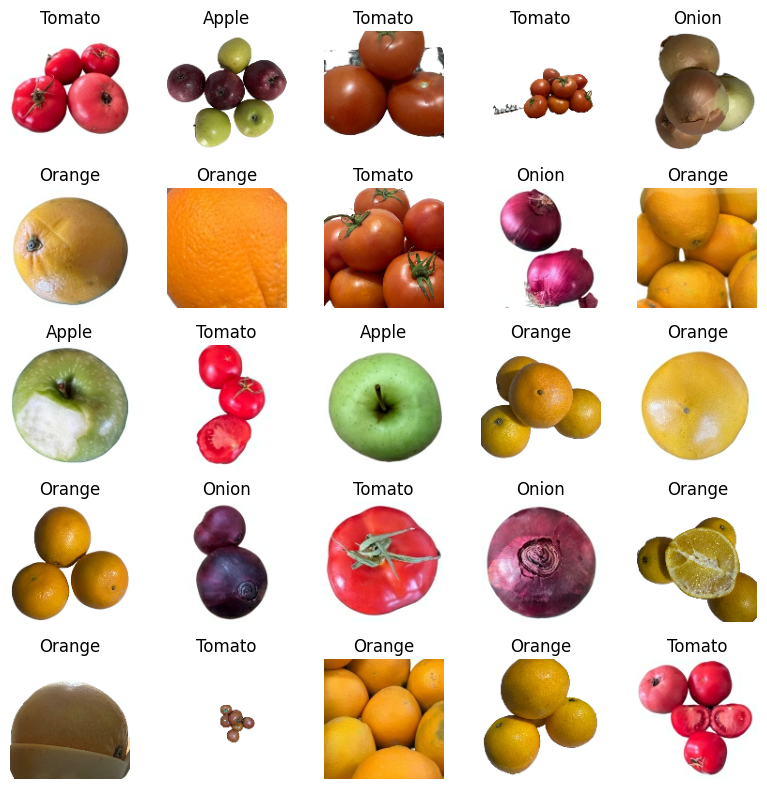

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for images_batch, labels_batch in x_train.take(1):
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.imshow(images_batch[i])
      plt.title(class_names[labels_batch[i]])
      plt.axis('off')
  plt.tight_layout()
  plt.show()

To define of model 2: This model is a convolutional neural network (CNN) for image classification has four convolutional layers (filters: 16, 32, 64, 64, kernel size (3x3). Each followed by max pooling, then a flatten layer, a dense layer with 512 units and 0.2 dropout, and a final softmax layer with units equal to the number of classes.

In [ ]:
#model 2

model = Sequential([

    layers.Conv2D(16, 3, padding='Same', activation='relu',input_shape=(128, 128, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(32,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding='Same', activation='relu'),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=len(class_names), activation='softmax')
])

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
Learning_rate (LR): A float, a keras.optimizers.schedules.LearningRateSchedule instance, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**ModelCheckpoint** in Keras saves models or weights during training for later use. You specify filepath, monitor a metric (e.g., val_loss), and optionally save only the best model. Supports dynamic naming verbosity control of 1. Essential for resuming training or deploying the best-performing model.

In [ ]:
# Model checkpoint
checkpointer = ModelCheckpoint(filepath='model.best.weights.h5',
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True,
                               save_weights_only=True)

In [ ]:
# Train the model
epochs_size = 5
history = model.fit(x_train,
                    batch_size=32,
                    validation_data=x_val,
                    epochs=epochs_size,
                    verbose=1,
                    shuffle=True)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 902ms/step - accuracy: 0.2956 - loss: 1.8808 - val_accuracy: 0.2500 - val_loss: 1.3782
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 656ms/step - accuracy: 0.3769 - loss: 1.3072 - val_accuracy: 0.4000 - val_loss: 1.3447
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 885ms/step - accuracy: 0.4717 - loss: 1.0753 - val_accuracy: 0.4750 - val_loss: 1.2348
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 657ms/step - accuracy: 0.4694 - loss: 1.0228 - val_accuracy: 0.4500 - val_loss: 1.0431
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 865ms/step - accuracy: 0.5794 - loss: 0.8687 - val_accuracy: 0.5500 - val_loss: 0.9713


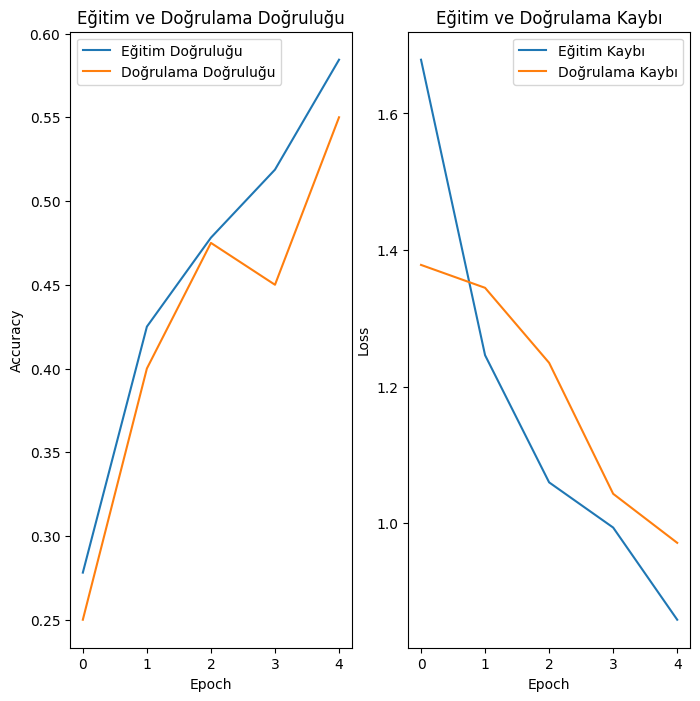

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Eğitim Doğruluğu')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Eğitim Kaybı')
plt.plot(epochs_range,history.history['val_loss'],label = 'Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

In [ ]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test)
print("Test accuracy:", test_acc)

# Get the training accuracy from the history object
train_acc = history.history['accuracy'][-1]

# Print the training accuracy
print('Training accuracy:', train_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6146 - loss: 0.8278 
Test accuracy: 0.625
Training accuracy: 0.5843750238418579


# **To define model 3 by improving model 2:**

There is an improvement in model 2. This model is a convolutional neural network (CNN).
Enhanced Model 2 by applying the following improvements parameters (Hyperparameter tuning)
Filter count change from 16-32-64-64 to 32-64-128-128 size
Batch_size change from 32 to 64
Dropout rate changed from 0.2 → 0.3.
Addition layers: one dense and one droupout.

In [ ]:
#model 3_1: Improved previous model

model = Sequential([

    layers.Conv2D(32, 3, padding='Same', activation='relu',input_shape=(128, 128, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128,3, padding='Same', activation='relu'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=len(class_names), activation='softmax')
])

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
Learning_rate (LR): A float, a keras.optimizers.schedules.LearningRateSchedule instance, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

ModelCheckpoint in Keras saves models or weights during training for later use. You specify filepath, monitor a metric (e.g., val_loss), and optionally save only the best model. Supports dynamic naming verbosity control of 2. Essential for resuming training or deploying the best-performing model.

In [ ]:
# Model checkpoint
checkpointer = ModelCheckpoint(filepath='model.best.weights.h5',
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True,
                               save_weights_only=True)

In [ ]:
# Train the model
epochs_size = 5
history = model.fit(x_train,
                    batch_size=64,
                    validation_data=x_val,
                    epochs=epochs_size,
                    callbacks=[checkpointer],
                    verbose=2,
                    shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.15515, saving model to model.best.weights.h5
10/10 - 19s - 2s/step - accuracy: 0.3531 - loss: 1.2993 - val_accuracy: 0.4750 - val_loss: 1.1551
Epoch 2/5

Epoch 2: val_loss improved from 1.15515 to 1.10537, saving model to model.best.weights.h5
10/10 - 16s - 2s/step - accuracy: 0.4406 - loss: 1.1504 - val_accuracy: 0.7000 - val_loss: 1.1054
Epoch 3/5

Epoch 3: val_loss did not improve from 1.10537
10/10 - 21s - 2s/step - accuracy: 0.5125 - loss: 0.9743 - val_accuracy: 0.4750 - val_loss: 1.1159
Epoch 4/5

Epoch 4: val_loss improved from 1.10537 to 0.97701, saving model to model.best.weights.h5
10/10 - 20s - 2s/step - accuracy: 0.5375 - loss: 0.9079 - val_accuracy: 0.6250 - val_loss: 0.9770
Epoch 5/5

Epoch 5: val_loss did not improve from 0.97701
10/10 - 16s - 2s/step - accuracy: 0.5781 - loss: 0.8768 - val_accuracy: 0.7500 - val_loss: 1.1754


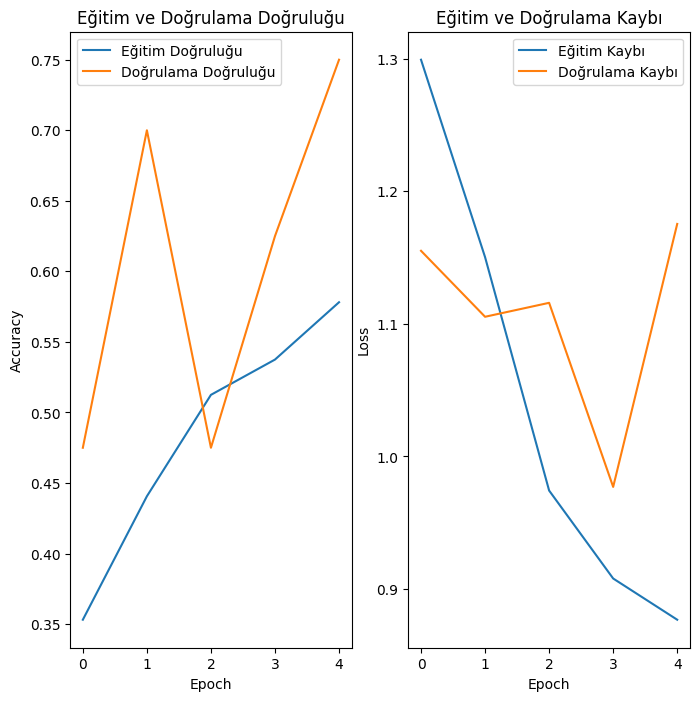

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Eğitim Doğruluğu')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Eğitim Kaybı')
plt.plot(epochs_range,history.history['val_loss'],label = 'Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

In [ ]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test)
print("Test accuracy:", test_acc)

# Get the training accuracy from the history object
train_acc = history.history['accuracy'][-1]

# Print the training accuracy
print('Training accuracy:', train_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.6312 - loss: 0.8245
Test accuracy: 0.6499999761581421
Training accuracy: 0.578125


**Model 3 by improving model 3_2:**
* There is an improvement in model 2. This model is a convolutional neural network (CNN).
* Enhanced Model 2 by applying the following improvements parameters (Hyperparameter tuning)
     
1.   Filter count change from  32-64-128-128 to 64-128-256-256 size
2. Batch_size change from 64 to 128
3. Dropout rate changed from 0.3 → 0.4.
4. Addition layers: one dense and one droupout and flatten.

In [ ]:
#model 3_2

model= Sequential([

    layers.Conv2D(64, 3, padding='Same', activation='relu',input_shape=(128, 128, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(128,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(256,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(256,3, padding='Same', activation='relu'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(units=len(class_names), activation='softmax')
])

**Adam optimization**
* is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
Learning_rate (LR): A float, a keras.optimizers.schedules.LearningRateSchedule instance, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.0005.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**ModelCheckpoint**
* in Keras saves models or weights during training for later use. You specify filepath, monitor a metric (e.g., val_loss), and optionally save only the best model. Supports dynamic naming verbosity control of 2. Essential for resuming training or deploying the best-performing model.

In [ ]:
# Model checkpoint
checkpointer = ModelCheckpoint(filepath='model.best.weights.h5',
                               monitor='val_loss',
                               verbose=2,
                               save_best_only=True,
                               save_weights_only=True)

In [ ]:
# Train the model
epochs_size = 5
history = model.fit(x_train,
                    batch_size=128,
                    validation_data=x_val,
                    epochs=epochs_size,
                    callbacks=[checkpointer],
                    verbose=1,
                    shuffle=True)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2535 - loss: 1.4415
Epoch 1: val_loss improved from inf to 1.22823, saving model to model.best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.2589 - loss: 1.4368 - val_accuracy: 0.4250 - val_loss: 1.2282
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4766 - loss: 1.1452
Epoch 2: val_loss improved from 1.22823 to 1.03814, saving model to model.best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.4767 - loss: 1.1397 - val_accuracy: 0.5250 - val_loss: 1.0381
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5145 - loss: 0.9838
Epoch 3: val_loss improved from 1.03814 to 1.01955, saving model to model.best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.5135 - loss: 0.9845 - val_accuracy: 0.5000 - val_loss: 1.0195
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5835 - loss: 0.9045
Epoch 4: val_loss improved from 1.01955 to 0.94423, saving mo

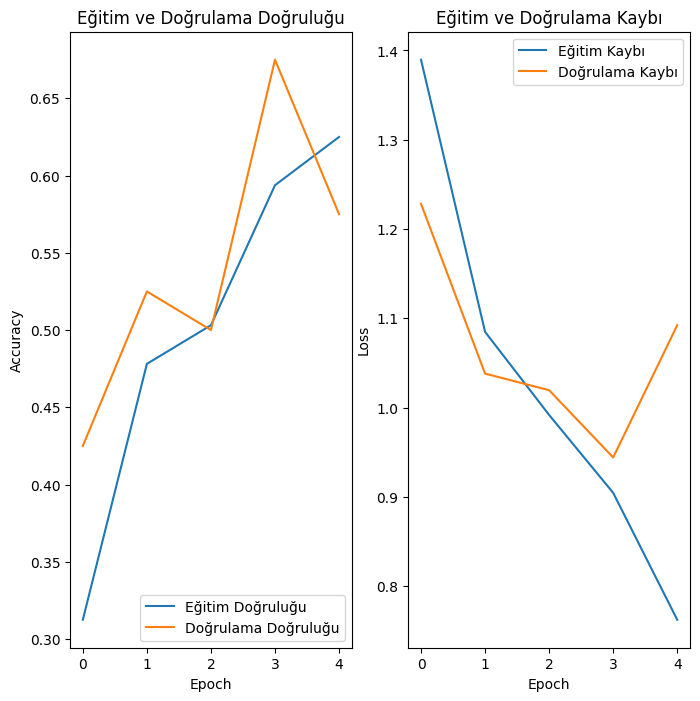

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Eğitim Doğruluğu')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Eğitim Kaybı')
plt.plot(epochs_range,history.history['val_loss'],label = 'Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

In [ ]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test)
print("Test accuracy:", test_acc)

# Get the training accuracy from the history object
train_acc = history.history['accuracy'][-1]

# Print the training accuracy
print('Training accuracy:', train_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.8042 - loss: 0.6145
Test accuracy: 0.800000011920929
Training accuracy: 0.625


**Data Augmentation**
* for imporving the Image Classification as well as possible. In this stage, I apply online data augmentation using ImageDataGeneration.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

X_train_images_list = []
for images_batch, _ in x_train.as_numpy_iterator():
    X_train_images_list.append(images_batch)

X_train_for_datagen_fit = np.concatenate(X_train_images_list, axis=0)

datagen.fit(X_train_for_datagen_fit)

In [ ]:
#model 3_3

model = Sequential([

    layers.Conv2D(64, 3, padding='Same', activation='relu',input_shape=(128, 128, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(128,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128,3, padding='Same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(258,3, padding='Same', activation='relu'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(units=len(class_names), activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Model checkpoint
checkpointer = ModelCheckpoint(filepath='model.best.weights.h5',
                               monitor='val_loss',
                               verbose=2,
                               save_best_only=True,
                               save_weights_only=True)

In [ ]:
# Train the model
epochs_size = 5
history_1 = model.fit(x_train,
                    batch_size=256,
                    validation_data=x_val,
                    epochs=epochs_size,
                    callbacks=[checkpointer],
                    verbose=2,
                    shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.25042, saving model to model.best.weights.h5
10/10 - 36s - 4s/step - accuracy: 0.3594 - loss: 1.2955 - val_accuracy: 0.3750 - val_loss: 1.2504
Epoch 2/5

Epoch 2: val_loss improved from 1.25042 to 1.17480, saving model to model.best.weights.h5
10/10 - 40s - 4s/step - accuracy: 0.4844 - loss: 1.0583 - val_accuracy: 0.5000 - val_loss: 1.1748
Epoch 3/5

Epoch 3: val_loss improved from 1.17480 to 1.10760, saving model to model.best.weights.h5
10/10 - 41s - 4s/step - accuracy: 0.5781 - loss: 0.8505 - val_accuracy: 0.6500 - val_loss: 1.1076
Epoch 4/5

Epoch 4: val_loss improved from 1.10760 to 0.98100, saving model to model.best.weights.h5
10/10 - 35s - 4s/step - accuracy: 0.7437 - loss: 0.6384 - val_accuracy: 0.6000 - val_loss: 0.9810
Epoch 5/5

Epoch 5: val_loss improved from 0.98100 to 0.75908, saving model to model.best.weights.h5
10/10 - 38s - 4s/step - accuracy: 0.7719 - loss: 0.5160 - val_accuracy: 0.8250 - val_loss: 0.7591


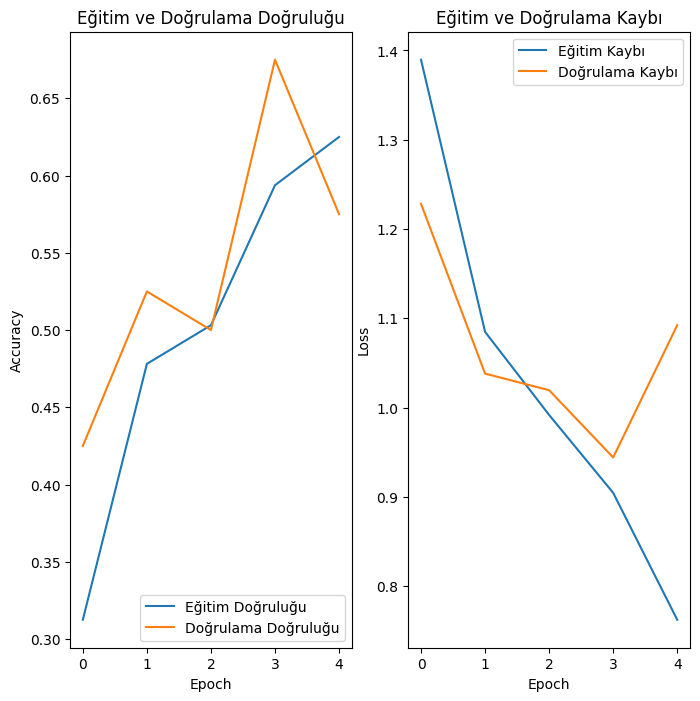

In [ ]:
epochs_range = range(len(history.history['accuracy'])) # Dynamically set epochs_range based on history length
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Eğitim Doğruluğu')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Eğitim Kaybı')
plt.plot(epochs_range,history.history['val_loss'],label = 'Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

In [ ]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test)
print("Test accuracy:", test_acc)

# Get the training accuracy from the history object
train_acc = history.history['accuracy'][-1]

# Print the training accuracy
print('Training accuracy:', train_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9021 - loss: 0.3849
Test accuracy: 0.8999999761581421
Training accuracy: 0.625


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


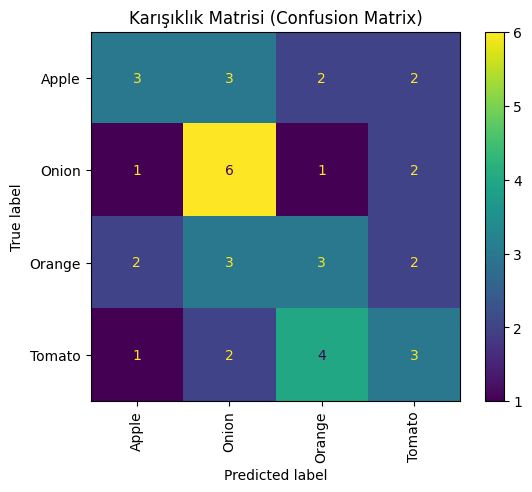

In [ ]:
# Karışıklık Matrisi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tahminleri al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek etiketleri al (daha önce oluşturulmuş y_test_np kullanılabilir)
y_true = y_test_np

# Karışıklık matrisi
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical')
plt.title("Karışıklık Matrisi (Confusion Matrix)")
plt.show()

Saving test onion1.jpeg to test onion1 (1).jpeg


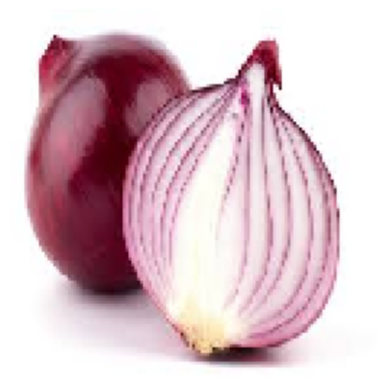

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Tahmin edilen sınıf: Onion
Olasılıklar: [[0.2312147  0.68735826 0.03256234 0.04886473]]


In [ ]:
# Kullanıcıdan resim yükle
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()  # bilgisayardan resim yükle

# Yüklenen dosya adını bul
img_path = list(uploaded.keys())[0]

# Resmi yükle ve işle
img = image.load_img(img_path, target_size=(128, 128)) # Adjusted target_size to match model input
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Tahmin yap
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

print("\nTahmin edilen sınıf:", class_names[class_index])
print("Olasılıklar:", prediction)

Saving test apple3.jpeg to test apple3.jpeg


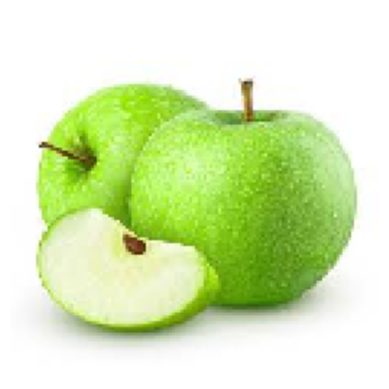

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

Tahmin edilen sınıf: Apple
Olasılıklar: [[9.9840862e-01 8.2180632e-04 1.6173308e-05 7.5341697e-04]]


In [ ]:
# Kullanıcıdan resim yükle
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()  # bilgisayardan resim yükle

# Yüklenen dosya adını bul
img_path = list(uploaded.keys())[0]

# Resmi yükle ve işle
img = image.load_img(img_path, target_size=(128, 128)) # Adjusted target_size to match model input
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Tahmin yap
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

print("\nTahmin edilen sınıf:", class_names[class_index])
print("Olasılıklar:", prediction)

Saving test orange2.jpeg to test orange2.jpeg


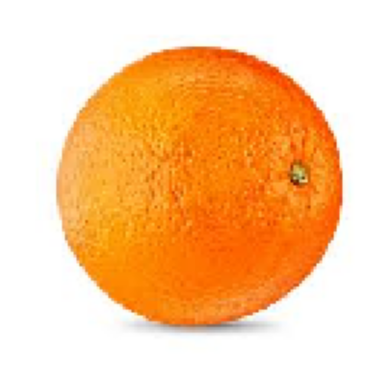

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Tahmin edilen sınıf: Orange
Olasılıklar: [[9.3445935e-16 8.2101406e-14 1.0000000e+00 5.2256260e-10]]


In [ ]:
# Kullanıcıdan resim yükle
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()  # bilgisayardan resim yükle

# Yüklenen dosya adını bul
img_path = list(uploaded.keys())[0]

# Resmi yükle ve işle
img = image.load_img(img_path, target_size=(128, 128)) # Adjusted target_size to match model input
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Tahmin yap
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

print("\nTahmin edilen sınıf:", class_names[class_index])
print("Olasılıklar:", prediction)

Saving test tomato.jpeg to test tomato.jpeg


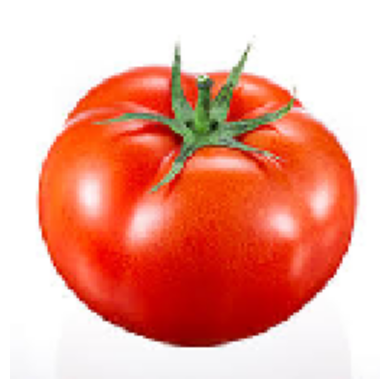

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Tahmin edilen sınıf: Tomato
Olasılıklar: [[5.77149659e-19 1.00485206e-16 5.19751910e-16 1.00000000e+00]]


In [ ]:
# Kullanıcıdan resim yükle
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()  # bilgisayardan resim yükle

# Yüklenen dosya adını bul
img_path = list(uploaded.keys())[0]

# Resmi yükle ve işle
img = image.load_img(img_path, target_size=(128, 128)) # Adjusted target_size to match model input
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Tahmin yap
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

print("\nTahmin edilen sınıf:", class_names[class_index])
print("Olasılıklar:", prediction)

In [ ]:
# Summary of results in Table
import pandas as pd

# Başlangıç: boş bir tablo oluştur
columns = [
    "Deney No", "Batch Size", "Filtre Sayısı", "Dropout Oranı",
    "Öğrenme Oranı", "Veri Artırımı", "Test Doğruluğu", "Notlar"
]
experiments = pd.DataFrame(columns=columns)

# 5 satır ekleyelim
data = [
    [1, 32, "16-32-64-64", 0.2, 0.001, "Hayır", "%62.5", "Temel model"],
    [2, 64, "32-64-128-128", 0.3, 0.001, "Evet", "%64.9", "Veri artırımı ile iyileşti"],
    [3, 128, "64-128-256-256", 0.4, 0.0005, "Evet", "%80.0", "Daha derin model etkili oldu"],
    [4, 256, "64-128-128-256", 0.4, 0.0005, "Evet", "%89.9", "Batch size artırıldı"]
]

# DataFrame'e ekle
experiments = pd.DataFrame(data, columns=columns)

# Göster
experiments


,Deney No,Batch Size,Filtre Sayısı,Dropout Oranı,Öğrenme Oranı,Veri Artırımı,Test Doğruluğu,Notlar
0,1,32,16-32-64-64,0.2,0.0010,Hayır,%62.5,Temel model
1,2,64,32-64-128-128,0.3,0.0010,Evet,%64.9,Veri artırımı ile iyileşti
2,3,128,64-128-256-256,0.4,0.0005,Evet,%80.0,Daha derin model etkili oldu
3,4,256,64-128-128-256,0.4,0.0005,Evet,%89.9,Batch size artırıldı


## **Rapor ve Sonuç**
Bu çalışma, elma, portakal, domates ve soğan olmak üzere dört sınıfa ayrılmış toplam 400 görüntüden oluşan bir veri kümesi üzerinde CNN (Convolutional Neural Network) mimarileri kullanılarak görüntü sınıflandırma problemine odaklanmıştır. Model performansını artırmak amacıyla farklı CNN yapılandırmaları denenmiştir:


**Temel Model (Deney No 1)**

* Mimari: Basit CNN (filtreler: 16-32-64-64), batch size 32, dropout oranı 0.2, öğrenme oranı 0.001, veri artırımı uygulanmamıştır.
* Test Doğruluğu: %62.5
* Gözlem: Başlangıç noktası olarak kullanılmış, ancak doğruluk oranı düşük kalmıştır.


**Veri Artırımı ile İyileştirilmiş Model (Deney No 2)**

* Filtreler: 32-64-128-128, batch size 64, dropout oranı 0.3, öğrenme oranı 0.001, veri artırımı uygulanmıştır.
* Test Doğruluğu: %64.9
* Gözlem: Veri artırımı genel performansı bir miktar iyileştirmiştir.



**Daha Derin CNN Mimarisi (Deney No 3)**

* Filtreler: 64-128-256-256, batch size 128, dropout oranı 0.4, öğrenme oranı 0.0005, veri artırımı uygulanmıştır.
* Test Doğruluğu: %80.0
* Gözlem: Ağ derinliğinin artırılması ve öğrenme oranının düşürülmesi doğrulukta belirgin bir artış sağlamıştır.

**Batch Size Artırımı ile Optimize Edilmiş Model (Deney No 4)**

* Filtreler: 64-128-128-256, batch size 256, dropout oranı 0.4, öğrenme oranı 0.0005, veri artırımı uygulanmıştır.
* Test Doğruluğu: %89.9
* Gözlem: Daha büyük batch size ve derin mimari en yüksek doğruluk değerini elde etmiştir.

**Genel Bulgular**

* Model derinliği ve karmaşıklığı, doğruluk üzerinde en güçlü etkiye sahip olmuştur. Basit CNN’den derin mimariye geçiş doğruluğu %62.5 → %80 → %89.9(**%27 artılmış**) seviyelerine yükseltmiştir.
Veri artırımı, özellikle derin mimarilerle birlikte kullanıldığında performansı anlamlı şekilde iyileştirmiştir.
* Öğrenme oranının düşürülmesi (0.0005), derin modellerde eğitim sürecini daha kararlı hale getirmiştir.
* Batch size artırımı, son deneyde en yüksek doğruluk değerine ulaşılmasına katkı sağlamıştır.


**Sonuç**
* Küçük veri kümelerinde (400 görüntü, 4 sınıf), aşamalı bir yaklaşım—basit CNN ile başlayıp derinliği artırmak, veri artırımı uygulamak ve hiperparametreleri optimize etmek—model doğruluğunu önemli ölçüde yükseltmektedir.
* Bu çalışmada en iyi yapılandırma yaklaşık %90 test doğruluğu elde etmiş ve derin CNN mimarilerinin uygun düzenleme ve veri artırımı ile basit modellere kıyasla üstün performans sergilediğini göstermiştir







# **REFERENCE:**

Özaltın, Ö., Köklü, M., Yonar, A., & Yeniay, Ö. (2022, June). Automatically image classification based on a new CNN architecture. In III International Applied Statistics Conference (UYIK-2022), Skopje, N Macedonia (pp. 22-24).


Uğuz, S., & Uysal, N. (2021). Classification of olive leaf diseases using deep convolutional neural networks. Neural computing and applications, 33(9), 4133-4149.


Recht, B., Roelofs, R., Schmidt, L., & Shankar, V. (2018). Do cifar-10 classifiers generalize to cifar-10?. arXiv preprint arXiv:1806.00451.

Li, H., Liu, H., Ji, X., Li, G., & Shi, L. (2017). Cifar10-dvs: an event-stream dataset for object classification. Frontiers in neuroscience, 11, 244131.

Cubuk, E. D., Zoph, B., Mane, D., Vasudevan, V., & Le, Q. V. (2019). Autoaugment: Learning augmentation strategies from data. In Proceedings of the IEEE/CVF conference on computer vision and pattern recognition (pp. 113-123).

Zheng, Q., Yang, M., Tian, X., Jiang, N., & Wang, D. (2020). A full stage data augmentation method in deep convolutional neural network for natural image classification. Discrete Dynamics in Nature and Society, 2020(1), 4706576.

Krizhevsky, A., & Hinton, G. (2010). Convolutional deep belief networks on cifar-10. Unpublished manuscript, 40(7), 1-9.